In [23]:
# divide image into 4 parts
def divide_image(img_div):
    h, w = img_div.shape[:2]
    h1 = int(h/2)
    w1 = int(w/2)
    img_div1 = img[0:h1, 0:w1]
    img_div2 = img[0:h1, w1:w]
    img_div3 = img[h1:h, 0:w1]
    img_div4 = img[h1:h, w1:w]
    return img_div1, img_div2, img_div3, img_div4

In [24]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

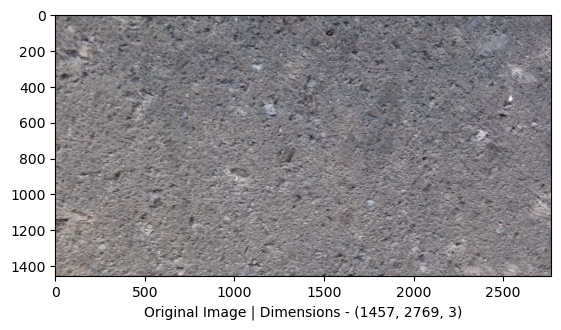

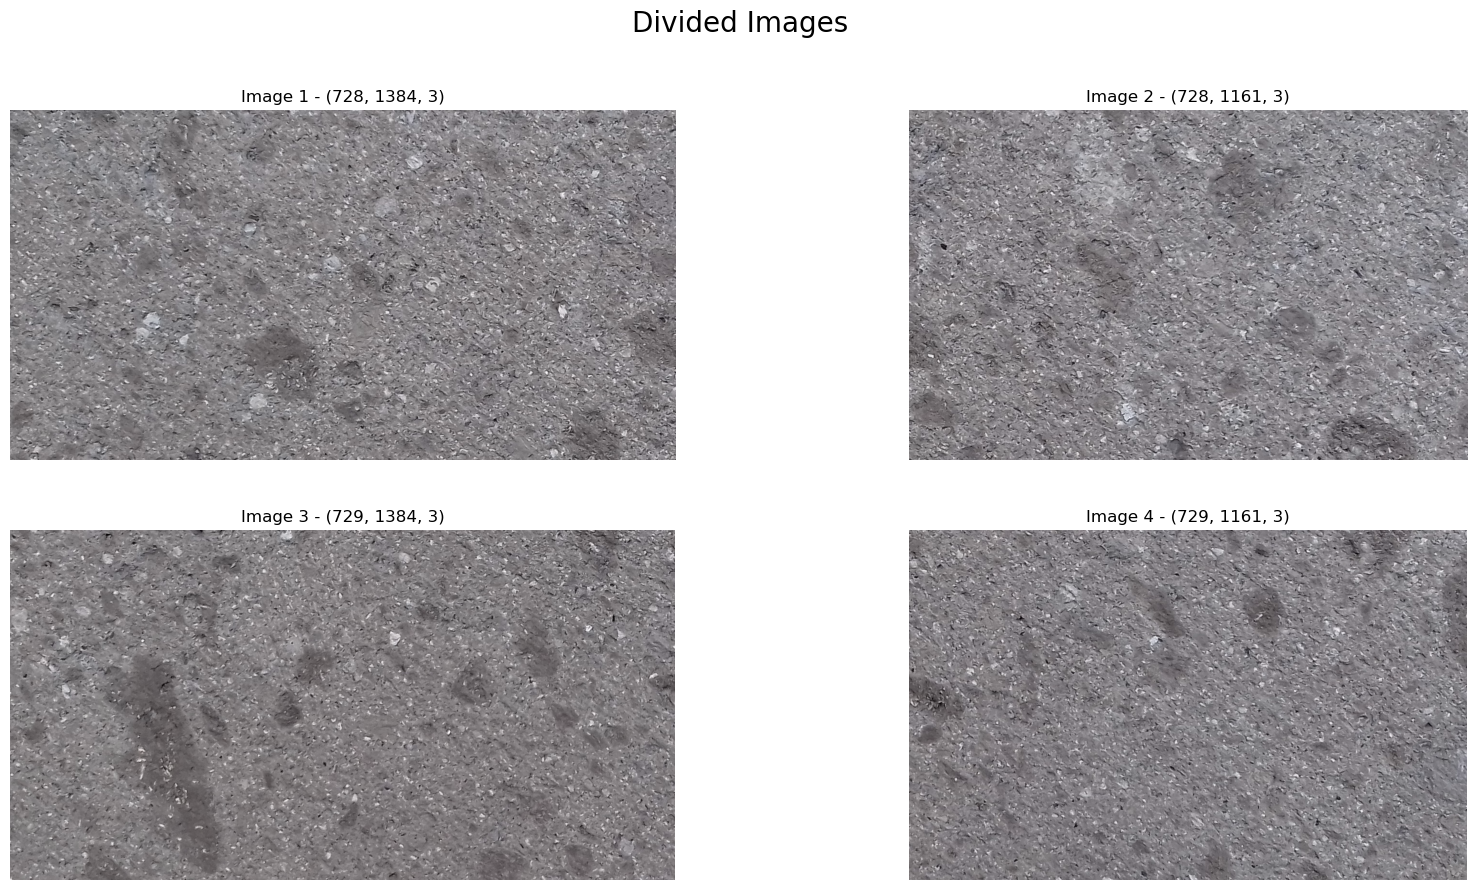

In [25]:
# Example
dir_img = ".../Rocks/dataset_org/c1/C1_1.jpg"
imgC = cv2.imread(dir_img)

img_n1, img_n2, img_n3, img_n4 = divide_image(imgC)

#orginal image
plt.imshow(imgC)
plt.xlabel("Original Image | Dimensions - " + str(imgC.shape))
plt.show()

#plot all 4 images in single plot with their dimensions as their lablel
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Divided Images", fontsize=20)
axes = ax.flatten()

for i in range(4):
    axes[i].imshow(eval(f"img_n{i+1}"))
    axes[i].set_title(f"Image {i+1} - {eval(f'img_n{i+1}').shape}")
    axes[i].axis('off')
plt.show()

In [26]:
# Original Image Dataset
org_dataset_dir = ".../Rocks/dataset_org/"

new_dataset_dir = ".../Rocks/dataset/"
if not os.path.exists(new_dataset_dir):
    os.mkdir(new_dataset_dir)

In [27]:
org_ds_size = 0
div_ds_size = 0

for i in tqdm(range(1, len(os.listdir(org_dataset_dir))+1)):
    # Path to original dataset's classes
    local_dir = org_dataset_dir + "c" + str(i) + "/"

    # Path to new dataset's classes
    new_dir = new_dataset_dir + "c" + str(i) + "/"
    os.mkdir(new_dir)

    for j in range(1, len(os.listdir(local_dir))+1):
        # Path to original dataset's images
        img_dir = local_dir + "C" + str(i) + "_" + str(j) + ".jpg"
        img = cv2.imread(img_dir)

        # Divide image into 4 parts
        img1, img2, img3, img4 = divide_image(img)

        # Save all 4 images in new dataset's classes
        cv2.imwrite(new_dir + "C" + str(i) + "_" + str(j) + "_1.jpg", img1)
        cv2.imwrite(new_dir + "C" + str(i) + "_" + str(j) + "_2.jpg", img2)
        cv2.imwrite(new_dir + "C" + str(i) + "_" + str(j) + "_3.jpg", img3)
        cv2.imwrite(new_dir + "C" + str(i) + "_" + str(j) + "_4.jpg", img4)

        # Counting number of images in original dataset
        org_ds_size += 1

        # Counting number of images in new dataset
        div_ds_size += 4

100%|██████████| 19/19 [05:15<00:00, 16.58s/it]


In [28]:
# Statistics & Comparison of Original and New Dataset
print("Original Dataset")
print("Total Images:", org_ds_size)

print("\nNew Dataset")
print("Total Images:", div_ds_size)

Original Dataset
Total Images: 950

New Dataset
Total Images: 3800
